In [2]:
%pylab inline
import pandas as pd
import swifter

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('taxi/nyc_data.csv')
fare = pd.read_csv('taxi/nyc_fare.csv')

In [4]:
data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:06:00,6,0,0.00,-73.991432,40.755081,-73.991417,40.755085
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:12:00,2,360,1.31,-73.966225,40.773716,-73.955399,40.782597


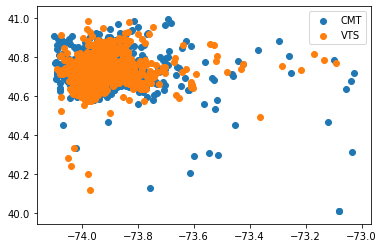

In [5]:
groups = data.groupby('vendor_id')
fig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group.pickup_longitude, group.pickup_latitude, label=name)
ax.legend()

plt.show()

    



In [6]:
data['start'] = pd.Series(zip(data.pickup_longitude, data.pickup_latitude)).apply(np.array)
data['end'] = pd.Series(zip(data.dropoff_longitude, data.dropoff_latitude)).apply(np.array)

In [7]:
s = np.stack(data.start.values)
e = np.stack(data.end.values)

In [8]:
from scipy.spatial import distance_matrix

In [9]:
#WAY TO BIG TO CALCULATE
#dm = distance_matrix(s,e)

In [10]:
bins = np.arange(0,1e5,5)
counts = pd.cut(data.trip_distance, bins).value_counts()
counts[counts>0]

(0.0, 5.0]        730114
(5.0, 10.0]        74076
(10.0, 15.0]       21233
(15.0, 20.0]       14510
(20.0, 25.0]        2727
(25.0, 30.0]         263
(30.0, 35.0]          53
(35.0, 40.0]          27
(40.0, 45.0]           8
(50.0, 55.0]           5
(45.0, 50.0]           4
(85.0, 90.0]           3
(65.0, 70.0]           3
(60.0, 65.0]           2
(55.0, 60.0]           2
(70.0, 75.0]           1
(75.0, 80.0]           1
(180.0, 185.0]         1
(95.0, 100.0]          1
(160.0, 165.0]         1
(440.0, 445.0]         1
Name: trip_distance, dtype: int64

In [11]:
data = data[data.trip_distance<100]

In [12]:
data['tdz'] = (data.trip_distance-data.trip_distance.mean())/data.trip_distance.std()

/Users/mgbvox/anaconda3/envs/data_science/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
bins = [-np.inf,-3, -2, -1, 0,1,2,3, np.inf]
pd.cut(data.tdz, bins).value_counts()

(-1.0, 0.0]     602003
(0.0, 1.0]      160506
(1.0, 2.0]       39926
(2.0, 3.0]       22568
(3.0, inf]       21938
(-2.0, -1.0]         0
(-3.0, -2.0]         0
(-inf, -3.0]         0
Name: tdz, dtype: int64

In [20]:
data['dlog'] = data.trip_distance.apply(np.log)
data = data[data.dlog>-np.inf]

/Users/mgbvox/anaconda3/envs/data_science/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


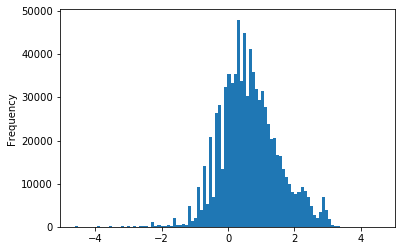

In [21]:
data.dlog.plot.hist(bins=100)

In [28]:
bins = np.arange(0,1e3,1)
counts = pd.cut(fare.fare_amount, bins).value_counts()
counts[counts>0]

(6.0, 7.0]        84245
(5.0, 6.0]        83287
(7.0, 8.0]        79152
(8.0, 9.0]        70930
(4.0, 5.0]        66466
                  ...  
(140.0, 141.0]        1
(120.0, 121.0]        1
(107.0, 108.0]        1
(121.0, 122.0]        1
(127.0, 128.0]        1
Name: fare_amount, Length: 158, dtype: int64

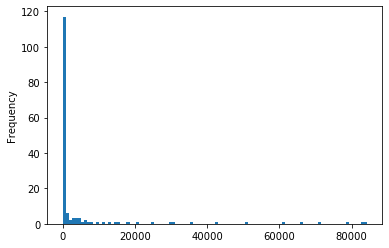

In [30]:
counts[counts>0].plot.hist(bins=100)

In [40]:
data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,start,end,tdz,dlog
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832,"[-73.955925, 40.781887]","[-73.963181, 40.777832]",-0.682839,-0.494296
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722,"[-74.005501, 40.745735]","[-73.964943, 40.755722]",0.124964,1.187843
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392,"[-73.969955, 40.79977]","[-73.954567, 40.787392]",-0.413571,0.405465
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:12:00,2,360,1.31,-73.966225,40.773716,-73.955399,40.782597,"[-73.966225, 40.773716]","[-73.955399, 40.782597]",-0.471055,0.270027
5,61E558C4FCB0BCB8562FC37B06B97FFE,76DC5E351A0E646679BCA84B18B37B9A,VTS,1,NaN,2013-01-01 00:07:00,2013-01-01 00:34:00,1,1620,5.81,-73.955238,40.768978,-73.994064,40.720299,"[-73.955238, 40.768978]","[-73.994064, 40.720299]",0.890411,1.759581


In [42]:
#Combine data and fare, taking into account pickup time and medallion.
merged = pd.merge(data, fare,  how='left', left_on=['medallion','pickup_datetime'],
         right_on = ['medallion','pickup_datetime'])


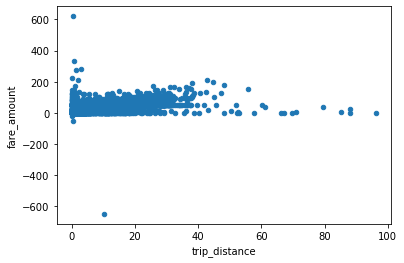

In [49]:
merged.plot.scatter('trip_distance', 'fare_amount')